## Load categorical metrics

In [1]:
import sys
sys.path.append("/home/files/uos_plantclassification")

In [2]:
import pandas as pd

df = pd.read_csv("/home/files/experiments/efficientB4/exp_set3/logs/categorical_metrics_test.csv")

df

,Unnamed: 0,name,samples_per_class,precision,recall
0,0,Lactuca virosa L.,43,1.0,0.372093
1,1,Pelargonium capitatum (L.) L'Hér.,1,0.0,0.000000
2,2,Pelargonium graveolens L'Hér.,215,1.0,0.795349
3,3,Cirsium arvense (L.) Scop.,428,1.0,0.869159
4,4,Cirsium vulgare (Savi) Ten.,648,1.0,0.913580
...,...,...,...,...,...
1076,1076,Schefflera morototoni (Aubl.) Maguire,1,NaN,0.000000
1077,1077,Bourreria andrieuxii (DC.) Hemsl.,1,NaN,0.000000
1078,1078,Bourreria costaricensis (Standl.) A.H. Gentry,1,NaN,0.000000
1079,1079,Alibertia edulis (Rich.) A. Rich.,1,NaN,0.000000


In [14]:
import os
dir_path = "/home/files/datasets/plantnet_300K/images/train/"
num_list = []
for sub in os.listdir(dir_path):
    label = sub
    sub_path= os.path.join(dir_path, sub)
    sub_num = len(os.listdir(sub_path))
    num_list.append(sub_num)

In [10]:
len(num_list)

1081

In [1]:
len(np.array(num_list)[np.array(num_list)>32])

NameError: name 'np' is not defined

(array([742., 112.,  42.,  38.,  23.,   8.,  10.,   8.,   6.,   7.,  10.,
          2.,   7.,   2.,   7.,   1.,   2.,   1.,   4.,   2.,   1.,   3.,
          1.,   5.,   4.,   0.,   2.,   2.,   0.,   1.,   1.,   2.,   1.,
          2.,   1.,   0.,   0.,   3.,   2.,   0.,   0.,   0.,   1.,   0.,
          1.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([2.00000e+00, 7.40600e+01, 1.46120e+02, 2.18180e+02, 2.90240e+02,
        3.62300e+02, 4.34360e+02, 5.06420e+02, 5.78480e+02, 6.50540e+02,
        7.22600e+02, 7.94660e+02, 8.66720e+02, 9.38780e+02, 1.01084e+03,
        1.08290e+03, 1.15496e+03, 1.22702e+03, 1.29908e+03, 1.37114e+03,
        1.44320e+03, 1.515

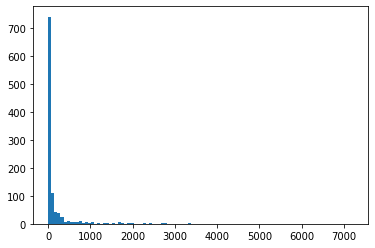

In [19]:
import numpy as np
from matplotlib import pyplot as plt

plt.hist(np.array(num_list), bins=100)


In [2]:
import pickle, json
import numpy as np
import torch
from torch import nn
from os.path import join
from config.path import PATH
from embeddings.extract_embeddings import Embedder
from embeddings.set_distance import SetDist
from utils.visualization import path2imgs, make_table
from matplotlib import pyplot as plt
root = PATH["PLANTNET-300K"]
emb_path = "/home/files/experiments/plantnet_embeddings_v3"

split = 'train'
emb = Embedder(root, split)
labels = list(emb.label_to_class.keys())
label_to_name = emb.label_to_name
name_to_label = name_to_label=dict([(value, key) for key, value in label_to_name.items()])

read .json recording bathacharrya distances between plants.

In [3]:
with open("/home/files/experiments/plantnet_embeddings_v3/dists_from_label148.json", 'r') as st_json: 
    dist_from_labels = json.load(st_json)


In [5]:
labels = list(dist_from_labels.keys())
print(len(labels))

148


In [ ]:
for label in dist_from_labels.keys():
    dist = dist_from_labels[label]['dists'][1]
    if dist<11:
        print(label, dist)    

In [ ]:
label = '1363129'
print(label_to_name[dist_from_labels[label]['target_label']])
print(dist_from_labels[label]['dists'])
print(dist_from_labels[label]['labels'])
print(list(map(lambda x : label_to_name[x], dist_from_labels[label]['labels'])))